In [1]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


In [2]:
RAVDESS = "ravdess-emotional-speech-audio"
CREMA = "cremad/AudioWAV/"
TESS = "tess"
SAVEE = "savee/ALL/"

<h3>RAVDESS</h3>

In [3]:
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

# Creating a key value according to the file names
emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files: 
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}/{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])
            
ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df['dataset'] = 'RAVDESS'

ravdess_df.head()

,path,sex,emotion,dataset
0,ravdess-emotional-speech-audio/audio_speech_ac...,male,neutral,RAVDESS
1,ravdess-emotional-speech-audio/audio_speech_ac...,female,neutral,RAVDESS
2,ravdess-emotional-speech-audio/audio_speech_ac...,male,neutral,RAVDESS
3,ravdess-emotional-speech-audio/audio_speech_ac...,female,neutral,RAVDESS
4,ravdess-emotional-speech-audio/audio_speech_ac...,male,neutral,RAVDESS


<h3>TESS</h3>

In [4]:
tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = [] 

# Creating a key value according to the file names
emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust'  : 'disgust',
}

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        if key in emotion_dic:
            path_list.append(f"{TESS}/{directory}/{audio_file}") 
            gender_list.append('female') # female only dataset
            emotion_list.append(emotion_dic[key])
            
tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df['dataset'] = 'TESS'
tess_df.head()

,path,sex,emotion,dataset
0,tess/Audio/OAF_back_angry.wav,female,angry,TESS
1,tess/Audio/OAF_back_disgust.wav,female,disgust,TESS
2,tess/Audio/OAF_back_fear.wav,female,fear,TESS
3,tess/Audio/OAF_back_happy.wav,female,happy,TESS
4,tess/Audio/OAF_back_neutral.wav,female,neutral,TESS


<h3>CREMA-D</h3>

In [5]:
crema_dir_list = os.listdir(CREMA)
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

# Creating a case list to seggregate the files
for i in crema_dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df[['sex', 'emotion']] = CREMA_df.labels.str.split("_", expand = True)
CREMA_df['dataset'] = 'CREMA'
CREMA_df.labels.value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

In [6]:
CREMA_df = CREMA_df.drop(['labels'], axis=1)

In [7]:
CREMA_df

,path,sex,emotion,dataset
0,cremad/AudioWAV/1001_DFA_ANG_XX.wav,male,angry,CREMA
1,cremad/AudioWAV/1001_DFA_DIS_XX.wav,male,disgust,CREMA
2,cremad/AudioWAV/1001_DFA_FEA_XX.wav,male,fear,CREMA
3,cremad/AudioWAV/1001_DFA_HAP_XX.wav,male,happy,CREMA
4,cremad/AudioWAV/1001_DFA_NEU_XX.wav,male,neutral,CREMA
...,...,...,...,...
7437,cremad/AudioWAV/1091_WSI_DIS_XX.wav,female,disgust,CREMA
7438,cremad/AudioWAV/1091_WSI_FEA_XX.wav,female,fear,CREMA
7439,cremad/AudioWAV/1091_WSI_HAP_XX.wav,female,happy,CREMA
7440,cremad/AudioWAV/1091_WSI_NEU_XX.wav,female,neutral,CREMA


<h3>SAVEE</h3>

In [8]:
savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

# Creating a key value according to the file names
emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}{audio_file}")
        gender_list.append('male') # male only dataset
        emotion_list.append(emotion_dic[key])
        
savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df['dataset'] = 'SAVEE'
savee_df.head()

,path,sex,emotion,dataset
0,savee/ALL/DC_a01.wav,male,angry,SAVEE
1,savee/ALL/DC_a02.wav,male,angry,SAVEE
2,savee/ALL/DC_a03.wav,male,angry,SAVEE
3,savee/ALL/DC_a04.wav,male,angry,SAVEE
4,savee/ALL/DC_a05.wav,male,angry,SAVEE


In [9]:
# Combining the individual dataframes into a single dataframe
df = pd.concat([
    ravdess_df, 
    CREMA_df, 
    tess_df, 
    savee_df
], axis=0)
df.head()

,path,sex,emotion,dataset
0,ravdess-emotional-speech-audio/audio_speech_ac...,male,neutral,RAVDESS
1,ravdess-emotional-speech-audio/audio_speech_ac...,female,neutral,RAVDESS
2,ravdess-emotional-speech-audio/audio_speech_ac...,male,neutral,RAVDESS
3,ravdess-emotional-speech-audio/audio_speech_ac...,female,neutral,RAVDESS
4,ravdess-emotional-speech-audio/audio_speech_ac...,male,neutral,RAVDESS


<h3>Data Augmentation</h3>

In [10]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=0.7)

# taking any example and checking for techniques.
path = np.array(df.path)[1]
data, sample_rate = librosa.load(path)

In [11]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = librosa.feature.zero_crossing_rate(y=data)
    result=np.hstack((result, np.squeeze(zcr))) # stacking horizontally

    '''# Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally'''
    
    # Root Mean Square Value
    rms = librosa.feature.rms(y=data)
    result = np.hstack((result, np.squeeze(rms))) # stacking horizontally

    # MFCC
    flatten:bool=True
    mfcc = librosa.feature.mfcc(y=data, sr=sample_rate)
    result = np.hstack((result, np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T))) # stacking horizontally

    '''# MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally'''
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with noise and pitching
    new_data = pitch(data, sample_rate)
    data_noise_pitch = noise(new_data)
    res3 = extract_features(data_noise_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [12]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [13]:
len(X), len(Y), df.path.shape

(33954, 33954, (11318,))

In [14]:
# Creating a new dataframe with a column with the emotion names
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.251953,0.376465,0.501465,0.509766,0.504395,0.502930,0.505371,0.504395,0.502441,0.506836,...,-0.330271,-2.718865,1.762054,-3.871066,-2.175155,1.841260,5.496709,-1.586014,-4.956050,neutral
2,0.256348,0.380859,0.500977,0.493652,0.496094,0.486328,0.481445,0.481934,0.487793,0.517090,...,-1.694306,2.172128,5.713744,-0.140552,-4.608919,-4.639028,-2.866230,-0.976971,4.385713,neutral
3,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586421,2.746858,2.223282,0.986924,-0.730690,-2.530884,-4.002834,-4.849378,-4.929748,neutral
4,0.250488,0.374023,0.494629,0.494141,0.497070,0.491699,0.495117,0.493652,0.488770,0.501465,...,1.571891,2.683772,-2.007904,-4.547439,-0.289352,-1.490969,-2.137108,-4.964978,-2.453282,neutral


In [15]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.251953,0.376465,0.501465,0.509766,0.504395,0.502930,0.505371,0.504395,0.502441,0.506836,...,-0.330271,-2.718865,1.762054,-3.871066,-2.175155,1.841260,5.496709,-1.586014,-4.956050,neutral
2,0.256348,0.380859,0.500977,0.493652,0.496094,0.486328,0.481445,0.481934,0.487793,0.517090,...,-1.694306,2.172128,5.713744,-0.140552,-4.608919,-4.639028,-2.866230,-0.976971,4.385713,neutral
3,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586421,2.746858,2.223282,0.986924,-0.730690,-2.530884,-4.002834,-4.849378,-4.929748,neutral
4,0.250488,0.374023,0.494629,0.494141,0.497070,0.491699,0.495117,0.493652,0.488770,0.501465,...,1.571891,2.683772,-2.007904,-4.547439,-0.289352,-1.490969,-2.137108,-4.964978,-2.453282,neutral


In [16]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [17]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(33954, 2377)

In [18]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

<h3> Data Preparation </h3>

In [19]:
# All rows and columns except the last column 
X = Emotions.iloc[: ,:-1].values
# Only the last column which has the emotion names
Y = Emotions['Emotions'].values

In [20]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [21]:
print(Y.shape)
X.shape

(33954, 6)


(33954, 2376)

In [22]:
# Splitting the data into train and test data using a 80/20 split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27163, 2376), (27163, 6), (6791, 2376), (6791, 6))

In [23]:
# Reshaping the data for CNN
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [24]:
# Scaling our data with sklearn's Standard Scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27163, 2376), (27163, 6), (6791, 2376), (6791, 6))

In [25]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [27]:
early_stop=EarlyStopping(monitor='val_accuracy',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [28]:
#Reshaping for the CNN model

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((27163, 2376, 1), (27163, 6), (6791, 2376, 1), (6791, 6))

In [29]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer
    
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer
    
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(6,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (BatchN  (None, 2376, 512)        2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1188, 512)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 1188, 512)        2048      
 hNormalization)                                                 
                                                        

In [30]:
# Running the model
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/50
425/425 [==============================] - 2103s 5s/step - loss: 1.4406 - accuracy: 0.4402 - val_loss: 1.6262 - val_accuracy: 0.3568 - lr: 0.0010
Epoch 2/50
425/425 [==============================] - 1681s 4s/step - loss: 1.1637 - accuracy: 0.5450 - val_loss: 1.2028 - val_accuracy: 0.5356 - lr: 0.0010
Epoch 3/50
425/425 [==============================] - 1672s 4s/step - loss: 1.0516 - accuracy: 0.5869 - val_loss: 1.1126 - val_accuracy: 0.5750 - lr: 0.0010
Epoch 4/50
425/425 [==============================] - 1672s 4s/step - loss: 0.9693 - accuracy: 0.6204 - val_loss: 1.1614 - val_accuracy: 0.5528 - lr: 0.0010
Epoch 5/50
425/425 [==============================] - 1672s 4s/step - loss: 0.8856 - accuracy: 0.6593 - val_loss: 1.2859 - val_accuracy: 0.5400 - lr: 0.0010
Epoch 6/50
425/425 [==============================] - 1834s 4s/step - loss: 0.7927 - accuracy: 0.6976 - val_loss: 1.1739 - val_accuracy: 0.5793 - lr: 0.0010
Epoch 7/50
425/425 [==============================] - 2033

213/213 [==============================] - 85s 397ms/step - loss: 0.2372 - accuracy: 0.9483
Accuracy of our model on test data :  94.83139514923096 %


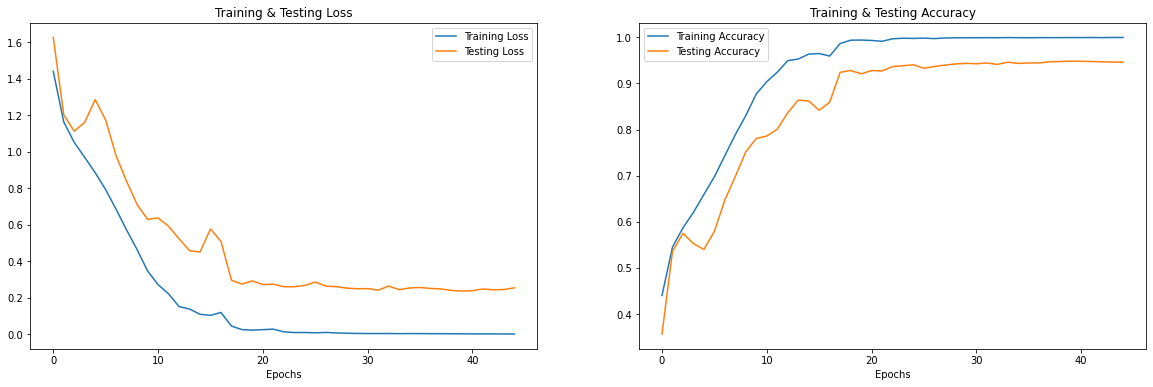

AttributeError: module 'matplotlib' has no attribute 'pyplot'

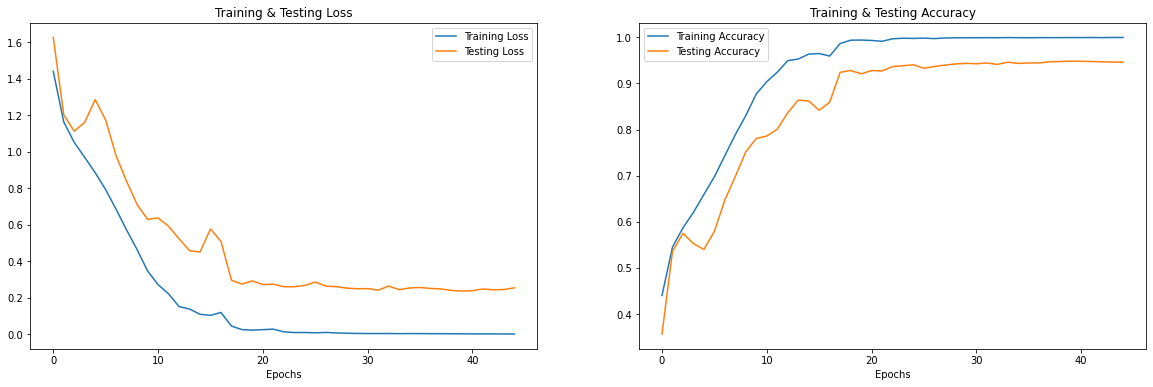

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [36]:
import matplotlib
import matplotlib.pyplot as plt
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(45)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [37]:
plt.close('all')

In [38]:
# Predicting on Test Data
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

213/213 [==============================] - 82s 386ms/step


,Predicted Labels,Actual Labels
0,sad,sad
1,neutral,neutral
2,disgust,disgust
3,happy,happy
4,angry,angry
5,angry,angry
6,sad,sad
7,happy,happy
8,disgust,disgust
9,disgust,disgust


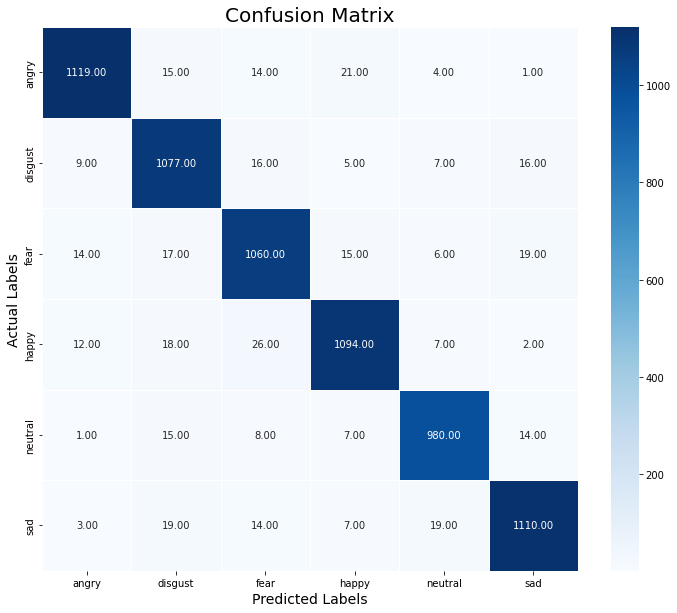

AttributeError: module 'matplotlib' has no attribute 'pyplot'

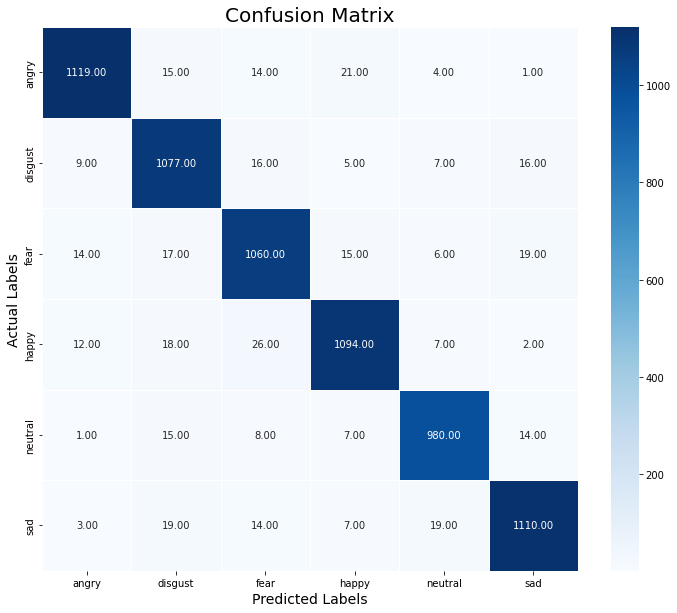

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [39]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [40]:
plt.close('all')

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test0, y_pred0))

              precision    recall  f1-score   support

       angry       0.97      0.95      0.96      1174
     disgust       0.93      0.95      0.94      1130
        fear       0.93      0.94      0.93      1131
       happy       0.95      0.94      0.95      1159
     neutral       0.96      0.96      0.96      1025
         sad       0.96      0.95      0.95      1172

    accuracy                           0.95      6791
   macro avg       0.95      0.95      0.95      6791
weighted avg       0.95      0.95      0.95      6791



<h3> Saving the Model </h3>

In [42]:
# Saving the model for future runs
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_model_weights.h5")
print("Saved model to disk") 


Saved model to disk


In [43]:
# Retrieve the saved model from disk
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("best_model1_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [44]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

213/213 [==============================] - 83s 386ms/step - loss: 0.2372 - accuracy: 0.9483
accuracy: 94.83%


In [45]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")    

Done


<h3> Model Validation</h3>

In [46]:
import librosa

In [47]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = librosa.feature.zero_crossing_rate(y=data)
    result=np.hstack((result, np.squeeze(zcr))) # stacking horizontally

    '''# Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally'''
    
    # Root Mean Square Value
    rms = librosa.feature.rms(y=data)
    result = np.hstack((result, np.squeeze(rms))) # stacking horizontally

    # MFCC
    flatten:bool=True
    mfcc = librosa.feature.mfcc(y=data, sr=sample_rate)
    result = np.hstack((result, np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T))) # stacking horizontally

    '''# MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally'''
    
    return result

In [48]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result)
    final_result=np.expand_dims(i_result, axis=2)
    
    return final_result

In [49]:
res=get_predict_feat("ravdess-emotional-speech-audio/audio_speech_actors_01-24/03-01-07-01-01-01-01.wav")
print(res.shape)

(1, 2376, 1)


In [50]:
emotions1={1:'Neutral', 2:'Happy', 3:'Sad', 4:'Angry', 5:'Fear', 6:'Disgust'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0])    

<h3> Testing with own audio </h3>

In [56]:
prediction("Sivaprasad_Angry.wav")

1/1 [==============================] - 0s 32ms/step
angry


In [59]:
prediction("Sivaprasad_Fear.wav")

1/1 [==============================] - 0s 33ms/step
fear


In [64]:
prediction("Sivaprasad_Happy.wav")

1/1 [==============================] - 0s 47ms/step
happy
